<a href="https://colab.research.google.com/github/h30e07/E4sosei/blob/main/2nen3nen_ipynb_%E3%81%AE%E3%82%B3%E3%83%94%E3%83%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from gensim.models.word2vec import Word2Vec
import glob
import pprint
from google.colab import files
import csv

"""
def tow_s_similarity(sa_path, sb_path):
  with open(sa_path) as s1:
    sa = s1.read()
  
  with open(sb_path) as s2:
    sb = s2.read()
  
  sa_words = sa.split()
  sb_words = sb.split()
  print(sa_words)
  print(sb_words)  
  sum = 0
  print(1)

  for sa_word in sa_words:
    for sb_word in sb_words:
      try:
        similarity = w2v_model.similarity(sa_word, sb_word)
        sum += similarity
      except KeyError:
        sum += 0

  output = sum / (len(sa_words) * len(sb_words))

  return output
"""

def syllabus_similarity(sa_path,sb_path):
  with open(sa_path) as s1:
    sa = s1.read()
  
  with open(sb_path) as s2:
    sb = s2.read()

  #set(集合)を使う。重複している単語は1つにまとまる
  sa_words_set = set(sa.split())
  sb_words_set = set(sb.split())

  sa_remained_set = sa_words_set - (sa_words_set &  sb_words_set)
  sb_remained_set = sb_words_set - (sa_words_set &  sb_words_set)

  print(sa_remained_set)
  print(sb_remained_set)

  saTosb_sim = 1 - len(sa_remained_set)/len(sa_words_set)   #sa_words_setの単語数に対する、saとsbで共通していなかった単語数の割合を、1から引く
  sbTosa_sim = 1 - len(sb_remained_set)/len(sb_words_set)   #sb_words_setの単語数に対する、saとsbで共通していなかった単語数の割合を、1から引く
  similarity=0
  if saTosb_sim != 1 and sbTosa_sim != 1:   #2つが部分集合出ないとき
    for _a in sa_remained_set:
      for _b in sb_remained_set:
        try:
          similarity += w2v_model.similarity(_a, _b)
        except KeyError:
          similarity += 0
    similarity /= (len(sa_remained_set)*len(sb_remained_set))
  
  if (saTosb_sim != 1) ^ (sbTosa_sim != 1):  #部分集合で等しくはないとき
    if saTosb_sim == 1:
      remained_set = sa_remained_set
    else:
      remained_set = sb_remained_set
    for _parent in sa_words_set &  sb_words_set:
      for _child in remained_set:
        try:
          similarity += w2v_model.similarity(_parent, _child)
        except KeyError:
          similarity += 0
    similarity /= (len(sa_remained_set)*len(sb_remained_set))
  
  saTosb_sim += similarity*len(sa_remained_set)/len(sa_words_set)
  sbTosa_sim += similarity*len(sb_remained_set)/len(sb_words_set)

  return saTosb_sim,sbTosa_sim   #戻り値はタプルになっている



path = "/content/drive/MyDrive/sosei/Pre-Trained Word2Vec Models/latest-ja-word2vec-gensim-model/word2vec.gensim.model"
w2v_model = Word2Vec.load(path)

print(syllabus_similarity("/content/drive/MyDrive/meishi/meishi/meishi_3電気回路ⅠA(2078).txt",
                          "/content/drive/MyDrive/meishi/meishi/meishi_3電気回路ⅠA(2078).txt"))
print(syllabus_similarity("/content/drive/MyDrive/meishi/meishi/meishi_3電気回路ⅠA(2078).txt",
                          "/content/drive/MyDrive/meishi/meishi/meishi_3電気回路ⅠB(2079).txt"))
print(syllabus_similarity("/content/drive/MyDrive/meishi/meishi/meishi_3電気回路ⅠA(2078).txt",
                          "/content/drive/MyDrive/meishi/meishi/meishi_2微分積分学ⅠA(0018).txt"))

set()
set()
(1.0, 1.0)
{'５', '代表', '最大', '位相', '理解', '春', 'IA', '７', '平均', '基', 'ブリッジ', '共振', 'じめ', '２', '力率', '実効', '重ね', '周波', 'キルヒホッフ', '並列', '瞬時', '虚数', '網目', '枝', 'C', '2078', '二', '端子', '節点', '三角', '適用', 'stQ', '意味', '周期', '前期', '正弦', 'A', '重ね合わせ', '１１', '理', '素子', 'テブナン', 'レポート', '初等', 'Kirchhoff', 'ndQ', '複合', '電荷', '特徴', 'R', 'オーム', '定理', 'フェーザ', '９', '物理', '電位', '表示', '対', '部品', '量', 'L', '法則', '直列', '条件', '本', '各部', '逆', '29', '３', '夏'}
{'Y', '14', 'テスト', '割合', '相互', '負荷', '2079', '特性', 'まとめ', 'rdQ', '対称', 'インダクタンス', 'インピーダンス', 'IB', '記号', '変換', '15', '後期', '結合', '冬', '極性', 'thQ', '発表', '４', '誘導', '各種', '％', 'B', '三', '変圧', 'コイル', '合計', '等価', '16'}
(0.7470565570257528, 0.8550272723981885)
{'位相', '併用', 'じめ', 'Blackboard', '並列', '電流', '知識', '虚数', '確認', '事前', '三角', '定着', '意味', '配布', '正弦', '重ね合わせ', '習熟', '素子', '電圧', '中間', 'R', '社', '特徴', 'フェーザ', '電位', '複素', '概念', '回路', '例', 'コロナ', '板書', '不足', '返却', '複雑', '細部', '平均', '２', '実効', '電子', 'キルヒホッフ', '網目', '2078', '達成', '二', '尚志', '菅谷',

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:58: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


(0.526669056568759, 0.5698793056849867)


Google Drive マウント

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
path = "/content/drive/MyDrive/sosei/Pre-Trained Word2Vec Models/latest-ja-word2vec-gensim-model/word2vec.gensim.model"
a = "/content/drive/MyDrive/sosei/meishi/meishi_3電気回路ⅠA(2078).txt"
b = "/content/drive/MyDrive/sosei/meishi/meishi_3電気回路ⅠB(2079).txt"
bibun_a = "/content/drive/MyDrive/sosei/meishi/meishi_2微分積分学ⅠA(0018).txt"

任意の2つの単語の関連性の分布を可視化する関数

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def caluculate_bunpu(list1):
  output = {}
  similarity_list = [d.get('similarity') for d in list1]
  bins = np.arange(-1, 1, 0.1) # 等差数列
  sr = pd.Series(similarity_list)
  sr1 = pd.cut(sr, bins=bins)
  vc = sr1.value_counts(sort=False)
  y, ind, pacthes = plt.hist(sr,bins = bins.size-2, range =(-1,1))
  print(y)
  print(ind)
  plt.show()
  return y.tolist()

AかつBの単語を取り除く(0かける)


set()
set()
1
{'IA', '条件', '意味', '９', 'じめ', '表示', '周期', '７', '正弦', '共振', '電荷', 'フェーザ', '本', '最大', 'L', '直列', '３', '適用', '並列', '初等', '５', 'C', '平均', '特徴', '部品', '枝', '節点', 'A', 'ndQ', '夏', 'Kirchhoff', '物理', 'テブナン', '実効', 'キルヒホッフ', '法則', '対', 'ブリッジ', 'レポート', '周波', '春', 'オーム', '基', '量', '複合', '各部', '１１', '網目', '端子', '瞬時', '２', 'stQ', '素子', '重ね', '理', '定理', '2078', '重ね合わせ', '三角', '代表', '理解', '力率', '二', '前期', '逆', '位相', 'R', '虚数', '電位', '29'}
{'割合', '等価', '16', 'コイル', '相互', '変圧', 'インダクタンス', '極性', '結合', '14', '特性', 'Y', '誘導', 'テスト', '各種', 'インピーダンス', '冬', '記号', 'まとめ', '％', '合計', '４', '15', '後期', 'IB', 'B', '発表', '2079', '負荷', '対称', '変換', '三', 'thQ', 'rdQ'}
[  0.   0.   0.   0.   1.   4.  44. 125. 264. 377. 333. 258. 178. 144.
  89.  48.  15.  11.]
[-1.         -0.88888889 -0.77777778 -0.66666667 -0.55555556 -0.44444444
 -0.33333333 -0.22222222 -0.11111111  0.          0.11111111  0.22222222
  0.33333333  0.44444444  0.55555556  0.66666667  0.77777778  0.88888889
  1.        ]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


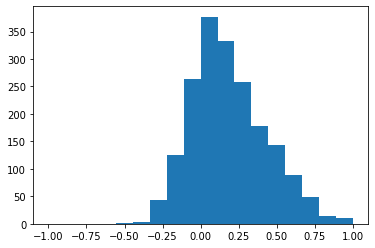

{'subject_combination': ['/content/drive/MyDrive/sosei/meishi/meishi_3電気回路ⅠA(2078).txt', '/content/drive/MyDrive/sosei/meishi/meishi_3電気回路ⅠB(2079).txt'], 'combination_sum': 1891, 'min': -0.5290051102638245, 'max': 0.9602669477462769, 'distribution': [0.0, 0.0, 0.0, 0.0, 1.0, 4.0, 44.0, 125.0, 264.0, 377.0, 333.0, 258.0, 178.0, 144.0, 89.0, 48.0, 15.0, 11.0], 'combination_list': [{'word1': '３', 'word2': '４', 'similarity': 0.9602669477462769}, {'word1': '５', 'word2': '４', 'similarity': 0.9548413753509521}, {'word1': '２', 'word2': '４', 'similarity': 0.9433859586715698}, {'word1': '二', 'word2': '三', 'similarity': 0.9376716613769531}, {'word1': '７', 'word2': '４', 'similarity': 0.9339644908905029}, {'word1': '29', 'word2': '15', 'similarity': 0.9221866130828857}, {'word1': '29', 'word2': '14', 'similarity': 0.9187450408935547}, {'word1': 'A', 'word2': 'B', 'similarity': 0.8988058567047119}, {'word1': '前期', 'word2': '後期', 'similarity': 0.8971942663192749}, {'word1': '29', 'word2': '16', 'simi

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: DeprecationWarning: Call to deprecated `similarity` (Method will be removed in 4.0.0, use self.wv.similarity() instead).


[0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 2.300e+01 2.270e+02
 1.063e+03 2.201e+03 2.589e+03 2.251e+03 1.528e+03 9.230e+02 4.340e+02
 2.230e+02 7.700e+01 3.700e+01 6.000e+00]
[-1.         -0.88888889 -0.77777778 -0.66666667 -0.55555556 -0.44444444
 -0.33333333 -0.22222222 -0.11111111  0.          0.11111111  0.22222222
  0.33333333  0.44444444  0.55555556  0.66666667  0.77777778  0.88888889
  1.        ]


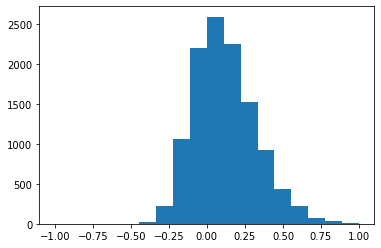

{'subject_combination': ['/content/drive/MyDrive/sosei/meishi/meishi_3電気回路ⅠA(2078).txt', '/content/drive/MyDrive/sosei/meishi/meishi_2微分積分学ⅠA(0018).txt'], 'combination_sum': 11583, 'min': -0.45809119939804077, 'max': 0.9221866130828857, 'distribution': [0.0, 0.0, 0.0, 0.0, 1.0, 23.0, 227.0, 1063.0, 2201.0, 2589.0, 2251.0, 1528.0, 923.0, 434.0, 223.0, 77.0, 37.0, 6.0], 'combination_list': [{'word1': '29', 'word2': '15', 'similarity': 0.9221866130828857}, {'word1': '29', 'word2': '14', 'similarity': 0.9187450408935547}, {'word1': '複素', 'word2': '級数', 'similarity': 0.9125677347183228}, {'word1': '29', 'word2': '16', 'similarity': 0.8967223763465881}, {'word1': 'C', 'word2': 'B', 'similarity': 0.8960659503936768}, {'word1': '複素', 'word2': '微分', 'similarity': 0.8892044425010681}, {'word1': '複素', 'word2': '総和', 'similarity': 0.8872288465499878}, {'word1': '柴田', 'word2': '佐々木', 'similarity': 0.8794835805892944}, {'word1': '複素', 'word2': '積分', 'similarity': 0.8758877515792847}, {'word1': '位相',

In [23]:
from gensim.models.word2vec import Word2Vec
import glob
import pprint
from google.colab import files
import csv
import json


def syllabus_similarity(sa_path,sb_path):
  file_output = {
    'subject_combination': [sa_path, sb_path],
    'combination_sum': 0,
    'min': 0,
    'max': 0,
    'distribution': [], #distribution 分布
    'combination_list': [],
  }

  with open(sa_path) as s1:
    sa = s1.read()
  
  with open(sb_path) as s2:
    sb = s2.read()

  #set(集合)を使う。重複している単語は1つにまとまる
  sa_words_set = set(sa.split())
  sb_words_set = set(sb.split())

  sa_remained_set = sa_words_set - (sa_words_set &  sb_words_set)
  sb_remained_set = sb_words_set - (sa_words_set &  sb_words_set)

  print(sa_remained_set)
  print(sb_remained_set)


  similarity_sum = 0
  if len(sa_remained_set) != 0  and len(sb_remained_set) != 0:   #2つが部分集合出ないとき
    for _a in sa_remained_set:
      for _b in sb_remained_set:
        try:
          similarity1 = w2v_model.similarity(_a, _b)
          similarity_sum += similarity1
          file_output['combination_list'].append({'word1': _a,'word2': _b, 'similarity': float(similarity1)})
        except KeyError:
          similarity_sum += 0
    similarity = similarity_sum / (len(sa_remained_set)*len(sb_remained_set))
  
    file_output['combination_list'] = sorted(file_output['combination_list'], key=lambda x: x['similarity'], reverse=True)
    file_output['combination_sum'] = len(file_output['combination_list'])
    file_output['min'] = file_output['combination_list'][-1]['similarity']
    file_output['max'] = file_output['combination_list'][0]['similarity']
    file_output['distribution'] = caluculate_bunpu(file_output['combination_list'])
    print(file_output)
    with open(f"/content/drive/MyDrive/sosei/bunpu111.json", 'w') as f:
      json.dump(file_output, f, indent=2, ensure_ascii=False)
   
  else:
    similarity = 1
  
  return similarity



w2v_model = Word2Vec.load(path)
print(syllabus_similarity(a, a))
print(syllabus_similarity(a, b))
print(syllabus_similarity(a, bibun_a))